In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data = pd.read_csv('./diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data_cleaned = data[(data['BloodPressure'] != 0) & 
                    (data['SkinThickness'] != 0) & 
                    (data['Insulin'] != 0) & 
                    (data['BMI'] != 0)]

print("Total Data Setiap Fitur setelah Penghapusan:")
data_cleaned.count()

Total Data Setiap Fitur setelah Penghapusan:


Pregnancies                 393
Glucose                     393
BloodPressure               393
SkinThickness               393
Insulin                     393
BMI                         393
DiabetesPedigreeFunction    393
Age                         393
Outcome                     393
dtype: int64

In [8]:
print("Data setelah Penghapusan:")
data_cleaned.head()

Data setelah Penghapusan:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


In [11]:
train_data, test_data = train_test_split(data_cleaned, test_size=0.2, random_state=42)
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [12]:
train_data = pd.read_csv("./train_data.csv")
train_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
309,1,136,74,50,204,37.4,0.399,24,0
310,6,125,68,30,120,30.0,0.464,32,0
311,3,116,74,15,105,26.3,0.107,24,0
312,10,68,106,23,49,35.5,0.285,47,0
313,0,140,65,26,130,42.6,0.431,24,1


In [14]:
test_data = pd.read_csv("./test_data.csv")
test_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
74,4,110,76,20,100,28.4,0.118,27,0
75,6,134,70,23,130,35.4,0.542,29,1
76,1,79,80,25,37,25.4,0.583,22,0
77,2,197,70,45,543,30.5,0.158,53,1
78,3,180,64,25,70,34.0,0.271,26,0


In [15]:
X_train = train_data.drop('Outcome', axis=1)
y_train = train_data['Outcome']
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = test_data.drop('Outcome', axis=1)
y_test = test_data['Outcome']
X_test = scaler.transform(X_test)

In [17]:
def create_model():
    model = Sequential([
        Dense(12, input_dim=X_train.shape[1], activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [18]:
epochs = 10
history_list = []

In [19]:
for i in range(epochs):
    print(f"Epoch {i+1}/{epochs}")
    model = create_model()
    history = model.fit(X_train, y_train, epochs=1, batch_size=10, verbose=0)
    history_list.append(history)
    print("Accuracy:", history.history['accuracy'][0])

Epoch 1/10


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.41082802414894104
Epoch 2/10
Accuracy: 0.6592356562614441
Epoch 3/10
Accuracy: 0.4585987329483032
Epoch 4/10
Accuracy: 0.5828025341033936
Epoch 5/10
Accuracy: 0.30254778265953064
Epoch 6/10
Accuracy: 0.40764331817626953
Epoch 7/10
Accuracy: 0.5636942386627197
Epoch 8/10
Accuracy: 0.5286624431610107
Epoch 9/10
Accuracy: 0.7261146306991577
Epoch 10/10
Accuracy: 0.7038216590881348


In [20]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Test Accuracy: 0.7848101265822784


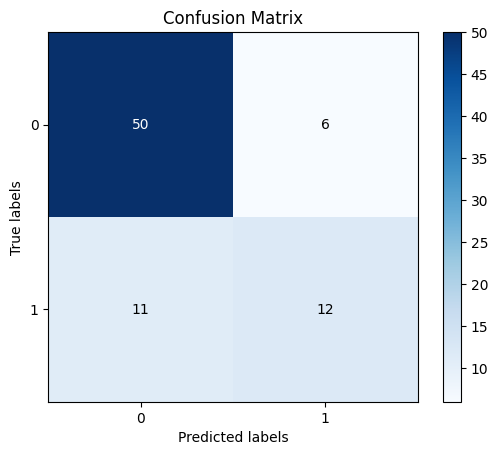

In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(2), ['0', '1'])
plt.yticks(np.arange(2), ['0', '1'])

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
      ha="center", va="center",
      color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()

In [29]:
tn = conf_matrix[0][0]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]
fp = conf_matrix[0][1]

In [30]:
def akurasi(tn, tp, fn, fp):
  akurasi = (tn + tp) / (tn + tp + fn + fp)
  return akurasi

print(akurasi(tn, tp, fn, fp))

0.7848101265822784


In [31]:
def presisi(tp, fp):
  presisi = tp / (tp + fp)
  return presisi

print(presisi(tp, fp))
pre = presisi(tp, fp)

0.6666666666666666


In [32]:
def recall(tp, fn):
  recall = tp / (tp + fn)
  return recall

print(recall(tp, fn))
rec = recall(tp, fn)

0.5217391304347826


In [33]:
def spesifitas(tn, fp):
  spesifitas = tn / (tn + fp)
  return spesifitas

print(spesifitas(tn, fp))

0.8928571428571429


In [34]:
def f1score(recall, presisi):
  fscore = (2 * recall * presisi) / (recall + presisi)
  return fscore

print(f1score(rec, pre))

0.5853658536585366
